## 6.5 Machine Learning Part 2

# This script contains the following:
## 1. Importing libraries and data and removing categorical columns
## 2. The elbow technique
## 3. k-Means clustering
## 4. Descriptive statistics
### Conclusion: what could be useful for further steps ..

# 1. Importing libraries and data and removing categorical columns

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Ensure the graphs are displayed in notebook

%matplotlib inline

In [3]:
# import path of dataframe
path = r"C:\Users\bhimc\Documents\Career Foundry (Achievement 6)"

In [4]:
path

'C:\\Users\\bhimc\\Documents\\Career Foundry (Achievement 6)'

In [5]:
# Import the Cleaned dataset of World Billionares 
df_world = pd.read_csv(os.path.join(path, 'World Billionares', '02 Data','Prepared Data', 'df_world_gdp.csv'), index_col=None)

In [6]:
df_world.head()

,Unnamed: 0,rank,final_worth,category,person_name,age,country,city,source,industries,...,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,tax_revenue_country,total_tax_rate_country,population_country,latitude_country,longitude_country,birth_data,world_billionaires
0,0,1,211000,Fashion & Retail,Bernard Arnault & family,74,France,Paris,LVMH,Fashion & Retail,...,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749,3/5/1949 0:00,35
1,1,2,180000,Automotive,Elon Musk,51,United States,Austin,"Tesla, SpaceX",Automotive,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,6/28/1971 0:00,754
2,2,3,114000,Technology,Jeff Bezos,59,United States,Medina,Amazon,Technology,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,1/12/1964 0:00,754
3,3,4,107000,Technology,Larry Ellison,78,United States,Lanai,Oracle,Technology,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/17/1944 0:00,754
4,4,5,106000,Finance & Investments,Warren Buffett,92,United States,Omaha,Berkshire Hathaway,Finance & Investments,...,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891,8/30/1930 0:00,754


In [7]:
df_world.shape

(2476, 35)

In [8]:
# Check the column names 

df_world.columns

Index(['Unnamed: 0', 'rank', 'final_worth', 'category', 'person_name', 'age',
       'country', 'city', 'source', 'industries', 'country_of_citizenship',
       'self_made', 'status', 'gender', 'birth_date', 'last_name',
       'first_name', 'date', 'state', 'birth_year', 'birth_month', 'birth_day',
       'cpi_country', 'cpi_change_country', 'gdp_country', 'tertiary_edc_rate',
       'primary_edc_rate', 'life_expectancy_country', 'tax_revenue_country',
       'total_tax_rate_country', 'population_country', 'latitude_country',
       'longitude_country', 'birth_data', 'world_billionaires'],
      dtype='object')

In [9]:
# Drop coulumn 'Unnamed: 0'

df = df_world.drop(columns = ['Unnamed: 0'])

In [10]:
# Create a subset which contain with 'World billionaires' and indicaters
df_sub = df_world[['final_worth', 'age', 'cpi_country', 'cpi_change_country', 'gdp_country', 'tertiary_edc_rate', 'primary_edc_rate',  'life_expectancy_country', 'total_tax_rate_country', 'population_country', 'world_billionaires' ]]

In [11]:
df_sub.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,total_tax_rate_country,population_country,world_billionaires
0,211000,74,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,35
1,180000,51,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754
2,114000,59,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754
3,107000,78,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754
4,106000,92,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754


In [12]:
#Check for missing values
df_sub.isnull().sum()

final_worth                0
age                        0
cpi_country                0
cpi_change_country         0
gdp_country                0
tertiary_edc_rate          0
primary_edc_rate           0
life_expectancy_country    0
total_tax_rate_country     0
population_country         0
world_billionaires         0
dtype: int64

# 2. The elbow technique

In [13]:
# Define the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [14]:
# Create a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_sub).score(df_sub) for i in range(len(kmeans))] 

score

C:\Users\bhimc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhimc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhimc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\bhimc\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

[-2.2693743606354586e+29,
 -2.6060467164705624e+27,
 -1.3057404008546355e+27,
 -5.9443808711555444e+26,
 -2.305146212721709e+26,
 -9.201427199143586e+25,
 -4.970936838639353e+25,
 -2.860570398160893e+25,
 -1.508477259431177e+25]

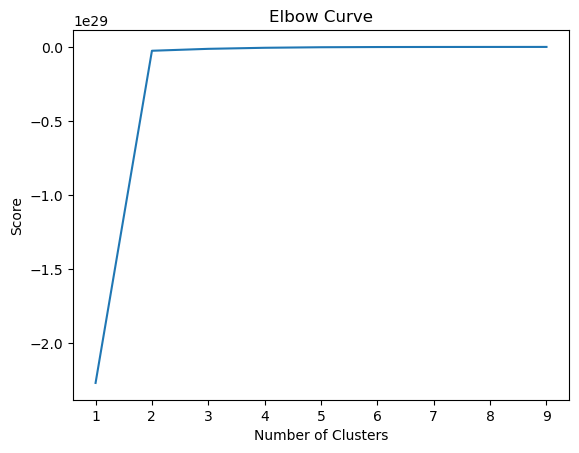

In [15]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### The elbow curve does not rise as dramatically after 3 clusters, so I will use 3 as the optinal number of clusters to use. 

# 3. k-Means clustering

In [16]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_init=10) 

In [17]:
# Fit the k-means object to the data.

kmeans.fit(df_sub)

KMeans(n_clusters=3, n_init=10)

In [18]:
# Now I will add a 'clusters' column to assign each record to a cluster
# Perform clustering using the k-means model and assign the results to new 'clusters' column

df_sub['clusters'] = kmeans.fit_predict(df_sub)

C:\Users\bhimc\AppData\Local\Temp\ipykernel_22904\35645973.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_sub)


In [19]:
df_sub.head()

,final_worth,age,cpi_country,cpi_change_country,gdp_country,tertiary_edc_rate,primary_edc_rate,life_expectancy_country,total_tax_rate_country,population_country,world_billionaires,clusters
0,211000,74,110.05,1.1,2.715518e+12,65.6,102.5,82.5,60.7,67059887.0,35,0
1,180000,51,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754,1
2,114000,59,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754,1
3,107000,78,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754,1
4,106000,92,117.24,7.5,2.142770e+13,88.2,101.8,78.5,36.6,328239523.0,754,1


In [20]:
# Check the frequency of each unique value in the 'clusters' column

df_sub['clusters'].value_counts()

clusters
1    1277
2     785
0     414
Name: count, dtype: int64

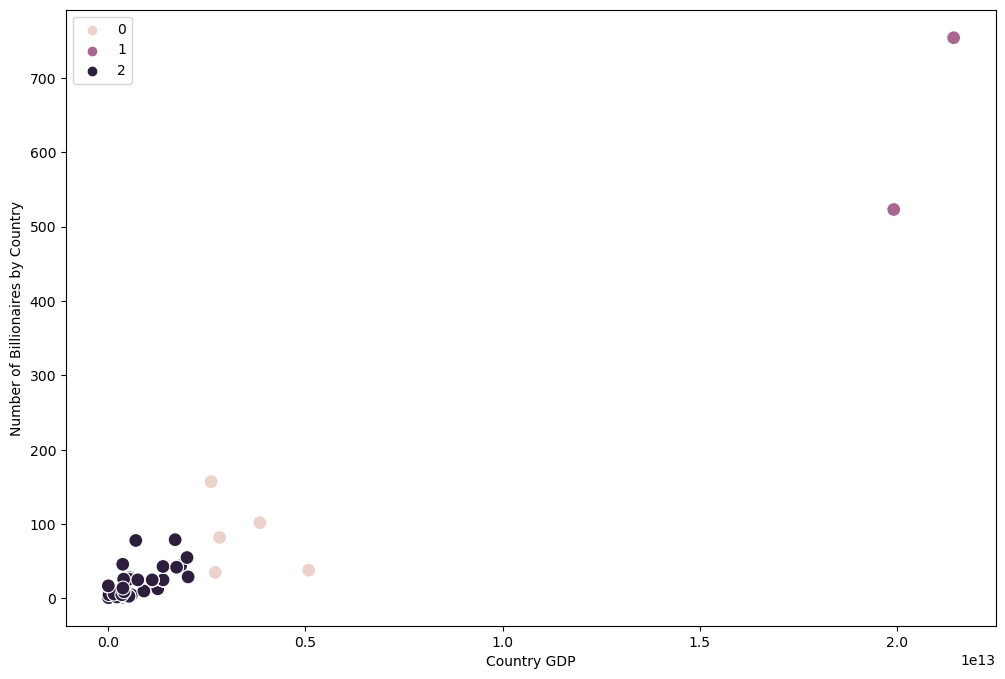

In [21]:
# Plot the clusters for the "gdp_country" and "country_total" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['gdp_country'], y=df_sub['world_billionaires'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country GDP') # Label x-axis.
plt.ylabel('Number of Billionaires by Country') # Label y-axis.
plt.show()

### The two huge outliers reduce the chart's size, making it difficult to notice details in the remaining data points. They are all piled on top of each other, therefore the visualization could be better in identifying patterns. However, I won't remove them for now, because I am not sure how they might affect the data. 

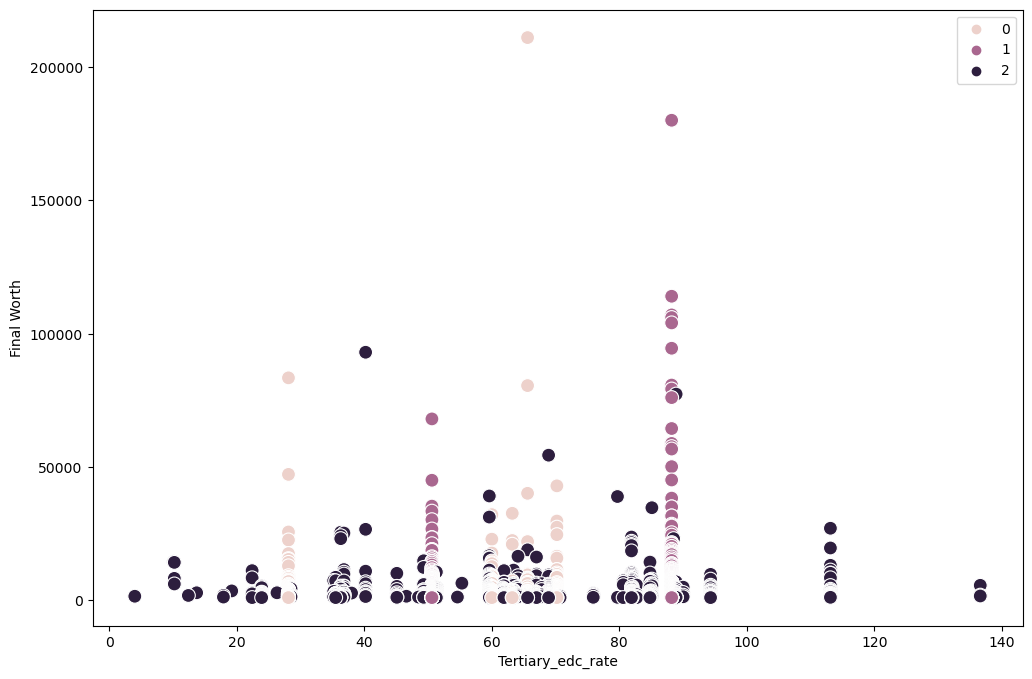

In [22]:
# Plot the clusters for the "final_worth" and "tertiary_edc_rate" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['tertiary_edc_rate'], y=df_sub['final_worth'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Tertiary_edc_rate') # Label x-axis.
plt.ylabel('Final Worth') # Label y-axis.
plt.show()

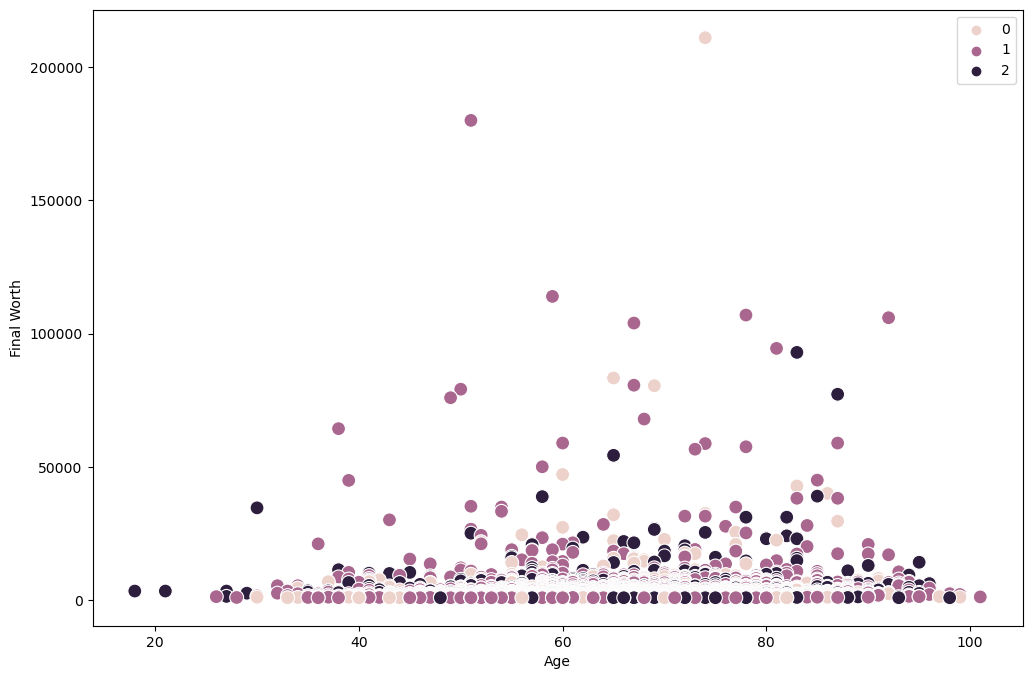

In [24]:
# Plot the clusters for the "final_worth" and "age" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['age'], y=df_sub['final_worth'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Age') # Label x-axis.
plt.ylabel('Final Worth') # Label y-axis.
plt.show()

### This graph doesn't show a clear indication of any pattern since all the clusters are grouped closely together. However, it seems that light pink spans closely with the age range, but it is hard to tell since they are so closely grouped.

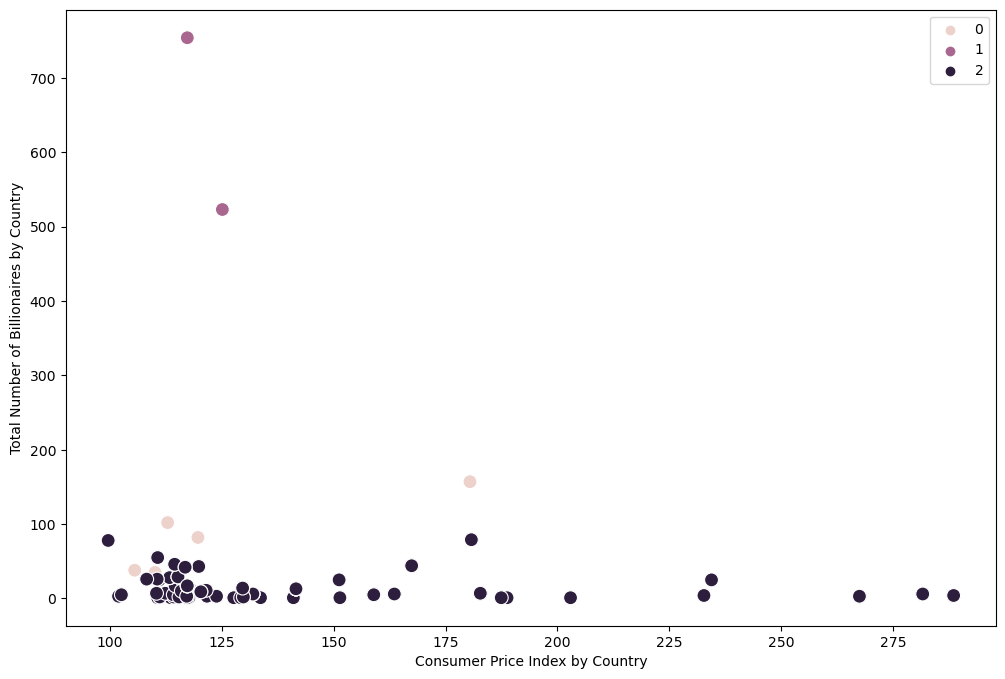

In [25]:
# # Plot the clusters for the "cpi_country" and "country_total" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['cpi_country'], y=df_sub['world_billionaires'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Consumer Price Index by Country') # Label x-axis.
plt.ylabel('Total Number of Billionaires by Country') # Label y-axis.
plt.show()

# 4. Descriptive statistics

In [26]:
# Descriptive statistics
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\bhimc\AppData\Local\Temp\ipykernel_22904\2185408620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'dark'


In [27]:
df_sub.groupby('cluster').agg({'gdp_country':['mean', 'median'], 
                         'world_billionaires':['mean', 'median'], 
                         'age':['mean', 'median'],
                          'final_worth':['mean', 'median'],
                         'tertiary_edc_rate':['mean', 'median'],
                           'cpi_country':['mean', 'median']})

gdp_country               world_billionaires               age  \
                 mean        median               mean median       mean   
cluster                                                                    
dark     1.003342e+12  7.030824e+11          37.871338   29.0  65.709554   
pink     3.193611e+12  2.827113e+12         107.357488  102.0  66.688406   
purple   2.080612e+13  2.142770e+13         659.393109  754.0  63.873923   

                final_worth         tertiary_edc_rate        cpi_country  \
        median         mean  median              mean median        mean   
cluster                                                                    
dark      66.0  3999.490446  2200.0         66.579873   64.1  133.486841   
pink      67.0  5091.304348  2450.0         51.182850   60.0  138.909686   
purple    63.0  4996.554424  2400.0         72.800783   88.2  120.450901   

                 
         median  
cluster          
dark     116.76  
pink     119.62  
purple   117.24

# Conclusion: what could be useful for further steps ..

### The purplecluster seems to have the the best stats in almost all categories. The median for world_billionaires is 754, which is signifcantly higher than the other two. 

### The age category is all very close within each other for both mean and median. It seems that many billionares are around the age of 60 to 70. 

### The pink cluster has the highest number for final worth and age. Furthermore, it also has the highest cpi per country. 

### The dark purple category has the lowest numbers in terms of gdp, billionaires per country, and final worth. 

### some further steps that I can take are: 
### 1. Test and analyis further between the factors of age and wealth. The olde the billionare is, the higher their final worth there seems to be. 
### 2. There seems to be that most billionares tend to live in countries with lower CPI compared to billionaires who live in countries with high CPI.
### 3. Many billionares live in a country that has a teritary education rate that is between 40% to 80%.
### 4. There appears to be a close relationship between a country's GDP and the number of billionairs that liev in that country. 

In [28]:
#Exporting df_World dataset)

df_sub.to_csv(os.path.join(path, 'World Billionares', '02 Data','Prepared Data', 'df_sub_clusters.csv'))